# Assignment 2
## Problem 3

Consider the Dataset_III and do the following steps:

$$ Importing\ modules $$

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from tabulate import tabulate

$$ Loading\ the\ dataset$$

In [27]:
dataset = pd.read_csv('Dataset_III.csv')
dataset.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


$$Section\ A$$

a) Read the text file, how many classes exist in the dataset? Which class has the most amount of data?

In [28]:
data_class = dataset['type'].unique()
print("Dataset Classes: " + str(data_class))
print("Number of Classes: " + str(len(data_class)))
print("The most frequent type of drinks is" , str(dataset['type'].mode()[0]))
print('The percentage of ' + str(dataset['type'].mode()[0]) + ' in the dataset: ' + str())

Dataset Classes: ['Coffee' 'Energy Drinks' 'Energy Shots' 'Soft Drinks' 'Tea' 'Water']
Number of Classes: 6
The most frequent type of drinks is Energy Drinks


**According to the Dataset_III, there are six types of drinks, and the most frequent one is "Energy Drinks".**

$$Section\ B$$

b) Plot the histogram of the numerical features. Explain what you understand

The most frequent Volume (ml) of drinks is between 282 and 423
The most frequent Calories of drinks is between 0 and 83
The most frequent Caffeine (mg) of drinks is between 0 and 155


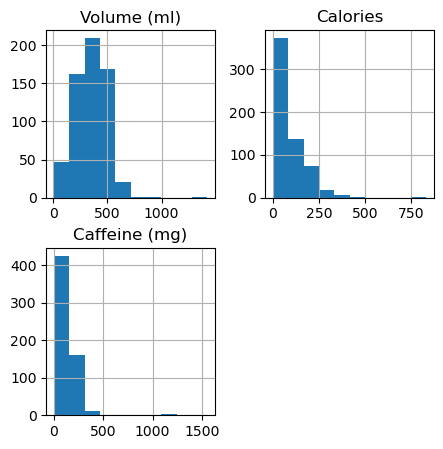

In [29]:
num_bins = 10
dataset.hist(bins=num_bins, figsize=(5,5))

feat_list = dataset.columns[1:4]

for i in range(len(feat_list)):

    rng = (max(dataset[feat_list[i]].values) - min(dataset[feat_list[i]].values))/num_bins
    rng_upper = (np.floor(dataset[feat_list[i]].mode()[0]/ rng) + 1) * rng
    rng_lower = rng_upper - rng
    print('The most frequent ' + str(feat_list[i])  + ' of drinks is between ' + str(int(rng_lower)) + ' and ' + str(int(rng_upper)))


**It can be seen that the most frequent drinks in terms of volume, calories, and caffeine are in the range of 282 to 423 (ml), 0 to 83, and 0 to 155 (mg) respectively.**

$$Section\ C$$

c) Use the KNN method in order to fit the appropriate model. For validation, use the F1 score metric.

In [107]:
# Shuffling the dataset rows
dataset = dataset.sample(frac=1).reset_index(drop=True) 
features = ['Volume (ml)', 'Calories', 'Caffeine (mg)']
label = ['type']

train_data, test_data = train_test_split(dataset, test_size=0.2)

X_train, Y_train = train_data[features].values, train_data[label].values
X_test, Y_test = test_data[features].values, test_data[label].values

features = dataset.columns.values[1:-1]
label = dataset.columns.values[-1]

In [127]:
n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, Y_train.ravel())

Y_pred = KNeighborsClassifier.predict(model, X_test)

print('By setting the number of neighbors in each class on ' + str(n_neighbors) + ' F1 Score is: ' + str(round(f1_score(Y_test, Y_pred, average="weighted"), 3)))

By setting the number of neighbors in each class on 5 F1 Score is: 0.683


**Rows of the dataset have been shuffled in the first section and then passed to the next one to be split in order to create a train dataset and test dataset. The KNN model has been applied to the training data. The number of neighbors in this model is set to 5. This model was then used on test data, and F1 Score was calculated.**

$$Section\ D$$

d) Find the best 𝑘

The maximum value of F1 Score: 0.683
Number of neighbors: 4


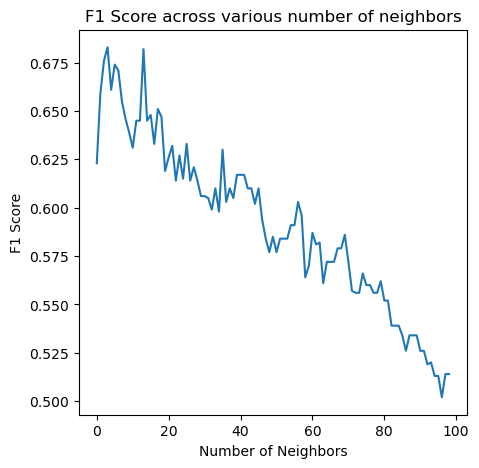

,Number of Neighbors,F1 Score
0,2,0.623
1,3,0.659
2,4,0.676
3,5,0.683
4,6,0.661
...,...,...
94,96,0.513
95,97,0.513
96,98,0.502
97,99,0.514


In [134]:
f1_list = []
n_neighbors_max = 99

for i in range(n_neighbors_max):

    model = KNeighborsClassifier(n_neighbors=i+2)
    model.fit(X_train, Y_train.ravel())
    
    Y_pred = model.predict(X_test).reshape(-1,1)
    f1_list.append(round(f1_score(Y_test, Y_pred, average="weighted"), 3))

output_table = pd.DataFrame({'Number of Neighbors': range(n_neighbors_max), 'F1 Score': f1_list})
output_table['Number of Neighbors'] += 2
print('The maximum value of F1 Score: ' + str(round(max(f1_list), 3)) + '\n' + 'Number of neighbors: ' + str(f1_list.index(max(f1_list))+1))

plt.figure(figsize=(5,5))
plt.plot(range(n_neighbors_max), f1_list)
plt.title('F1 Score across various number of neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Score')
plt.show()

output_table

**A for loop has been created in order to find the optimum number of neighbors. In this case, the number of neighbors increased gradually from 2 to 100 and was stored in a data frame called "output_table" along with corresponding F1 scores. Finally, the maximum F1 score and a plot of data frame data have been generated.**